데이터 과학자의 전직 여부 예측 전, 시각화를 포함한 EDA와 전처리 과정 두 번째

[첫 번째 게시글][postlink]에서는 데이터 과학자의 전직 여부를 예측하기에 앞서 5개의 컬럼에 대한 시각화와 전처리를 실시하였습니다. 이번 게시글에서는 나머지 컬럼들에 대한 EDA와 전처리를 이어서 진행해보고자합니다. 주제와 데이터에 대한 설명이 필요하신 분들은 이전 게시글을 참고해주세요.

[postlink]: https://eunju-choe.github.io/posts/2022-05-20-DataScientist%20EDA%201

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

먼저 이전 게시글에서 전처리한 결과를 저장해둔 파일을 불러옵니다.

In [2]:
df = pd.read_csv('df_processed_1.csv')
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_M,gender_F
0,0.920,1,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0
1,0.776,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0
2,0.624,0,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0
3,0.789,0,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0
4,0.767,1,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0


*df_processed_1.csv* 파일은 [Github][link]에서 다운받으실 수 있습니다.
 
[link]: https://github.com/Eunju-Choe/Eunju-Choe/tree/main/blog/ds_classification

# 1. 컬럼별 EDA와 전처리

이전 게시글에서 사용했던 함수를 다시 한 번 정의하였습니다. 추가적으로 categorical 변수를 시각화하는 **plot_cat()** 함수를 정의하였습니다.

In [411]:
def check_cat(x):
    """
    x : pd.Series 형식의 input
    categorical 변수의 유일값과 결측치의 개수를 확인하고 value_counts 출력
    """
    print('유일값 개수 :', x.nunique())
    print('결측치 개수 :', x.isna().sum(), end='\n\n')
    print('### value counts ###')
    print(x.value_counts())
    
    
def check_cont(x):
    """
    x : pd.Series 형식의 input
    연속형 변수의 결측치 개수를 확인하고 describe 출력
    """
    print('결측치 개수 :', x.isna().sum(), end='\n\n')
    print('### describe ###')
    print(x.describe())
    
    
def plot_cat(x_name):
    """
    x_name : str 형식의 df의 컬럼명을 input
    categorical 변수를 시각화하고 전직 희망 비율을 출력
    """
    plt.figure(figsize=(8,5))
    sns.countplot(x=x_name, hue='target', data=df)
    plt.legend(labels=['Not looking for job change', 'Looking for a job change'], fontsize=13)
    plt.title(f'{x_name}에 따른 전직 희망 분포', fontsize=15)
    plt.show()
    
    return pd.DataFrame(df.groupby(x_name).mean()['target'])

## 1.5. enrolled_university

- Type of university course enrolled if any

In [412]:
check_cat(df['enrolled_university'])

유일값 개수 : 3
결측치 개수 : 386

### value counts ###
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64


'enrolled_university'는 386개의 **결측치가 존재**하여 이에 대한 처리가 필요하며, **문자형 변수이기때문에 인코딩 작업**도 필요합니다.
 
등록된 대학에 따른 전직 희망 분포에 대한 그래프는 아래와 같습니다.

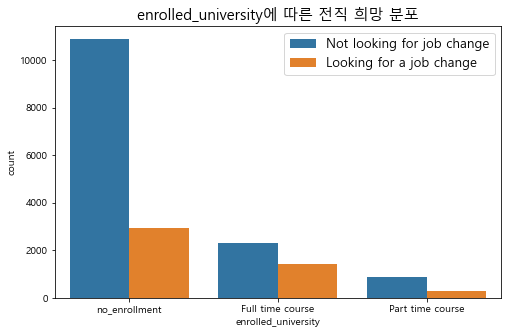

,target
enrolled_university,
Full time course,0.380889
Part time course,0.252087
no_enrollment,0.211406


In [413]:
plot_cat('enrolled_university')

enrolled_university는 **현재** 대학을 다니고 있는지를 나타냅니다. **Full time course의 경우 다른 집단보다 전직 희망 비율이 높은 것을 확인**할 수 있습니다. *이에 대해 자의적인 해석을 덧붙이면,* 전일제 대학을 다니고 있는 사람의 경우 대부분 졸업 후에 취직을 희망할 것입니다. 반면 no_enrollement는 대학을 다니고 있지 않은 사람들로, 현재 소속된 직장이 있을 확률이 높습니다. 따라서 Full time course에서 전직 희망 비율이 높고, no_enrollment에서 전직 희망 비율이 낮다고 해석할 수 있습니다.

In [414]:
df = pd.get_dummies(df, columns=['enrolled_university'])
df.head()

,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_M,gender_F,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment
0,0.920,1,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0,0,0,1
1,0.776,0,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0,0,0,1
2,0.624,0,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0,1,0,0
3,0.789,0,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0,0,0,0
4,0.767,1,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0,0,0,1


enrolled_university는 그 값의 차이가 서열이 존재하는 데이터가 아니기때문에 **(명목척도, nominal scale)** dummy 변수로 바꾸었습니다. 결측치의 경우 자연스럽게 **더미화로 생성된 3개의 컬럼에서 모두 0의 값을 갖는 것으로 처리**되었습니다.

## 1.6. education_level

- Edu level

In [415]:
check_cat(df['education_level'])

유일값 개수 : 5
결측치 개수 : 460

### value counts ###
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


대졸자(Graduate)가 전체의 60%로 가장 많은 비율을 차지하는 것을 간단하게 확인할 수 있습니다. education_level 역시 **결측치 처리**와 **레이블 인코딩**이 필요합니다.

education_level에 따른 전직 희망 분포는 다음과 같습니다.

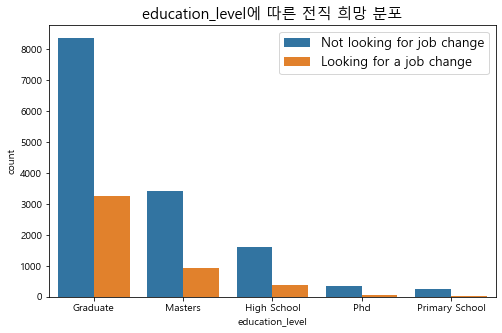

,target
education_level,
Graduate,0.279790
High School,0.195340
Masters,0.214400
Phd,0.140097
Primary School,0.133117


In [416]:
plot_cat('education_level')

**전직 희망 비율도 대졸자가 가장 높습니다.** 또한 다른 집단에 비하여 비교적 높은 비율을 갖고 있는 것을 알 수 있습니다.

학력의 경우 값들 사이에 **서열이 존재**한다고 할 수 있습니다. 따라서 Primary < High < Graduate < Masters < Phd의 순서로 Label Encoding을 실시하였습니다.

In [417]:
edu_level = {'Primary School' : 1, 'High School' : 2,
            'Graduate' : 3, 'Masters' : 4, 'Phd' : 5}

df['education_level'] = df['education_level'].apply(lambda x : edu_level.get(x, x))
df['education_level'].value_counts()

3.0    11598
4.0     4361
2.0     2017
5.0      414
1.0      308
Name: education_level, dtype: int64

value_counts() 함수를 이용하여 레이블 인코딩이 제대로 수행된 것을 확인하였습니다. 이어서 결측치 처리를 실시합니다.

In [418]:
df['education_level'] = df['education_level'].fillna(3)
print('결측치 개수 :', df['education_level'].isna().sum())

결측치 개수 : 0


결측치는 단순하게 **최빈값**이자 **중앙값**인 3(Graduate)로 대체하였습니다.

## 1.7. major_discipline

In [419]:
check_cat(df['major_discipline'])

유일값 개수 : 6
결측치 개수 : 2813

### value counts ###
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


major_discipline 역시 **결측치 처리**와 **문자형 변수를 수치화**하는 작업이 필요합니다. 그리고 유일값이 6개인데 **대부분(약 75%)이 STEM(Science, Technology, Engineering, Math) 전공**임을 확인할 수 있습니다.

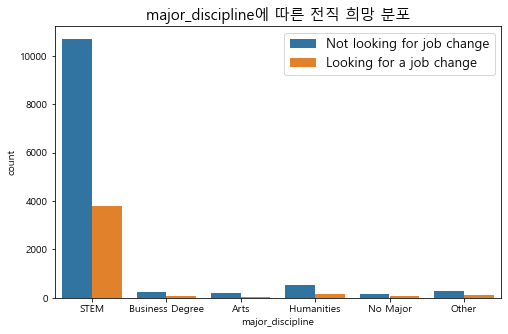

,target
major_discipline,
Arts,0.209486
Business Degree,0.262997
Humanities,0.210762
No Major,0.246637
Other,0.267717
STEM,0.261593


In [420]:
plot_cat('major_discipline')

전직 희망 비율에서 범주별로 큰 차이는 없는 것처럼 보입니다. 그리고 STEM 외의 다른 전공은 그 표본의 수가 적기때문에, 큰 의미를 찾기 어렵다고 판단하였습니다. 따라서 모든 범주를 라벨링하기보다는 **'is_STEM'이라는 컬럼을 추가하여, STEM 전공인 경우 1의 값을 그 외의 전공인 경우 0의 값을 갖도록 처리**하였습니다.

In [421]:
df['is_STEM'] = df['major_discipline'].apply(lambda x:1 if x=='STEM' else 0)

우선적으로 is_STEM에서는 결측치 역시 0의 값을 갖도록 되어있습니다. 하지만 별다른 근거 없이 0으로 처리하는 것은 좋지 않은 방법이라 생각합니다. 따라서 major_discipline이 결측치인 행들의 학력(education_level)을 확인해보겠습니다.

In [422]:
cond = df['major_discipline'].isna()
df[cond]['education_level'].value_counts()

2.0    2017
3.0     482
1.0     308
4.0       6
Name: education_level, dtype: int64

위의 출력값에서 1과 2는 각각 Primary School과 High School을 가리킵니다. 즉 **전공이 존재하지 않는 것**입니다. 따라서 이 값들은 그대로 **is_STEM을 0으로 처리**해도 될 것 같습니다.

하지만 학력이 3과 4의 값을 갖는 경우에는 학사 혹은 석사로 전공을 0으로 처리하는 것이 좋은 방법은 아닌 것 같습니다. 따라서 education_level이 3과 4의 값을 갖는, 즉 **최종 학력이 학사 혹은 석사인 경우에는 최빈값인 STEM 전공일 것이라 가정하고 is_STEM을 1로 처리**하겠습니다.

In [423]:
cond1 = df['major_discipline'].isna()
cond2 = ((df['education_level']==3) | (df['education_level']==4))
df[cond1 & cond2]['is_STEM'] = 1

In [424]:
df = df.drop('major_discipline', axis=1)

인코딩과 결측치 처리가 완료되었으므로 major_discipline 컬럼은 드랍합니다.

## 1.8. experience
- Total experience in years

In [425]:
check_cat(df['experience'])

유일값 개수 : 22
결측치 개수 : 65

### value counts ###
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


마치 수치형 변수인 것처럼 보이지만 1보다 작은 값이 <1로 입력되어있고, 20보다 큰 값은 >20으로 입력되어있어 check_cat() 함수를 이용하였습니다.

experience는 65개의 **결측치**를 갖고 있으며, 역시 **문자형을 수치형으로 변환**하는 작업이 필요합니다.

In [426]:
df['experience'] = df['experience'].apply(lambda x: 21 if x=='>20'
                                         else 0 if x=='<1'
                                          else x)
df['experience'] = df['experience'].astype(float)

먼저 값들을 수치형으로 바꾸는 작업부터 진행하였습니다. 단순하게 '>20'의 값들은 21로 '<1'의 값들은 0으로 바꾸었으며, 그 외의 값들은 기존의 값을 유지하고 이를 수치형으로 변환하였습니다.

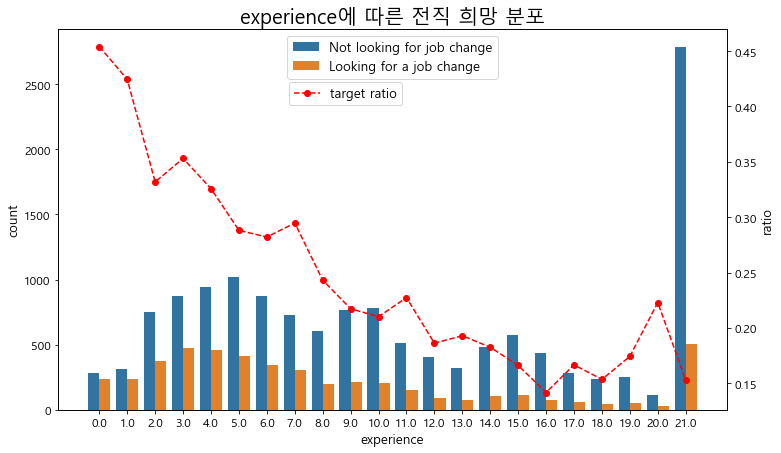

In [427]:
temp = pd.DataFrame(df.groupby('experience').mean()['target'])

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.plot()
sns.countplot(x='experience', hue='target', data=df)
plt.legend(labels=['Not looking for job change', 'Looking for a job change'], fontsize=13, loc='upper center')
plt.xlabel('experience', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

ax2 = ax1.twinx()
ax2.plot(temp['target'], 'r--o')
plt.legend(labels=['target ratio'], fontsize=13, loc=(0.345, 0.8))
plt.ylabel('ratio', fontsize=13)
plt.yticks(fontsize = 12)

plt.title('experience에 따른 전직 희망 분포', fontsize=20)
plt.show()

위의 그래프는 experience에 따른 전직 희망 분포와 전직 희망 비율을 나타냅니다. 그래프를 통해 **경력이 길수록 전직을 희망하는 비율이 낮아지는 것을 확인**할 수 있습니다. 이에 대해 상관계수를 한 번 계산해보도록 하겠습니다.

In [428]:
import scipy.stats as stats

rho, p_val = stats.pearsonr(temp.index, temp['target'])
print(f'상관계수 : {rho:.2f}, p-val : {p_val}')

상관계수 : -0.90, p-val : 1.7856749514276456e-08


통계적으로 확인하기 위해 pearson 상관 분석을 실시한 결과, 도시별 발전지수와 전직 희망 비율의 상관계수가 -0.9로 유의수준 0.01에서 아주 강한 음의 상관관계를 보였습니다. 즉 **경력이 길수록 전직을 고려하는 비율이 낮다**고 할 수 있습니다.

이어서 결측치 처리를 진행하였습니다.

In [429]:
df[df['experience'].isna()]

,city_development_index,relevent_experience,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_M,gender_F,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,is_STEM
135,0.920,0,5.0,NaN,NaN,NaN,NaN,70,0.0,0,0,0,0,1,1
391,0.698,1,4.0,NaN,NaN,NaN,NaN,44,1.0,1,0,1,0,0,0
1589,0.698,0,3.0,NaN,NaN,NaN,never,33,0.0,0,0,0,0,1,0
2727,0.920,1,4.0,NaN,NaN,NaN,NaN,70,0.0,0,0,0,0,1,1
2859,0.920,0,3.0,NaN,10/49,NaN,1,41,1.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,0.624,1,4.0,NaN,5000-9999,NaN,1,13,1.0,0,0,0,0,1,1
18055,0.698,1,3.0,NaN,10/49,NaN,1,51,1.0,0,0,0,0,0,0
18143,0.624,1,3.0,NaN,10/49,NaN,NaN,182,1.0,0,0,0,0,1,1
18790,0.926,1,3.0,NaN,50-99,NGO,1,138,0.0,0,0,0,0,0,1


experience의 값이 없는 행을 간단하게 살펴보면 **다른 컬럼에서도 동일하게 결측치**가 나타납니다. 이를 통해 본 데이터에서의 결측치는 **응답 거부** 혹은 **정보 활용 거부** 등으로 인해 발생하였을 것이라 추측할 수 있습니다.

experience의 경우 다른 컬럼에 비해 결측치가 65개로 적기때문에, 결측치를 처리하기보다는 **결측이 존재하는 행을 삭제**하는 방식을 채택하였습니다.

In [430]:
df = df.dropna(axis=0, subset=['experience'])

## 1.9. company_size

- Number of employees in current employer's company

In [431]:
check_cat(df['company_size'])

유일값 개수 : 8
결측치 개수 : 5915

### value counts ###
50-99        3078
100-500      2563
10000+       2011
10/49        1466
1000-4999    1323
<10          1304
500-999       874
5000-9999     559
Name: company_size, dtype: int64


company_size 역시 **결측치 처리**와 **수치형으로의 변환**이 필요합니다.

size는 범주에 따른 서열이 존재하므로 레이블 인코딩을 실시합니다. 원본 데이터가 범위로 주어져있기 때문에 그 값들의 중간값으로 수치화할 수 있지만, **다른 컬럼들과 scale을 맞추기 위해서 1~8사이의 값으로 변환**하였습니다.

In [432]:
comp_size = {'<10' : 1, '10/49' : 2, '50-99' : 3, 
            '100-500' : 4, '500-999' : 5, '1000-4999' :6,
            '5000-9999' : 7, '10000+' : 8}

df['company_size'] = df['company_size'].apply(lambda x: comp_size.get(x, x))

이어서 결측치 처리를 진행합니다. company_size의 결측치는 약 6천 개로 그 개수가 적지 않습니다. 이는 응답자가 답변을 하지 않은 경우일수도 있고, 현재 직장이 없어서 답할 수 없는 경우일수도 있습니다. 전자의 경우 1~8사이의 값으로 대체해야할 것이며 전자의 경우 0으로 대체해야할 것입니다. 하지만, 본 데이터에서는 둘 중 어디에 속하는지를 확실하게 구분할 근거가 없었습니다. 따라서 **결측치는 단순히 0으로 대체**하는 방식을 채택하였습니다.

In [433]:
df['company_size'] = df['company_size'].fillna(0)
df['company_size'].isna().sum()

0

## 1.10. company_type

- type of current employer

In [434]:
check_cat(df['company_type'])

유일값 개수 : 6
결측치 개수 : 6104

### value counts ###
Pvt Ltd                9796
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Other                   121
Name: company_type, dtype: int64


결측치 처리와 문자형 변수를 수치화하는 작업이 필요합니다. 그리고 Pvt Ltd가 압도적으로 많은 것(전체의 약 50%)을 확인할 수 있었습니다.

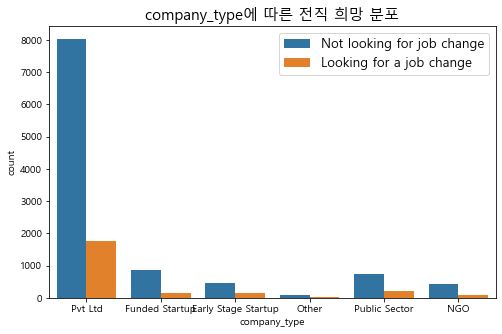

,target
company_type,
Early Stage Startup,0.234609
Funded Startup,0.140140
NGO,0.184971
Other,0.239669
Public Sector,0.220357
Pvt Ltd,0.180584


In [435]:
plot_cat('company_type')

범주별로 전직 희망 비율에 대해 큰 인사이트는 찾을 수 없었습니다. 또한 Pvt Ltd를 제외한 경우에는 표본도 적어서 유의미한 분석이 어렵습니다. 

company_type의 경우, 결측치가 6000개로 전체 데이터의 30%로 많은 부분을 차지하고 있으며 그 외에는 Pvt Ltd가 50%를 차지하고 있기때문에, 결측치를 대체하기 보다는 컬럼을 삭제하는 것이 도움이 될 것이라 판단하여 컬럼을 삭제하였습니다.

In [436]:
df = df.drop('company_type', axis=1)

## 1.11. last_new_job

- Difference in years between previous job and current job

In [437]:
check_cat(df['last_new_job'])

유일값 개수 : 6
결측치 개수 : 399

### value counts ###
1        8019
>4       3283
2        2897
never    2444
4        1028
3        1023
Name: last_new_job, dtype: int64


다른 컬럼들과 동일하게 결측치 처리와 수치형 변수로의 변환이 필요합니다. experience와 동일한 방식으로 'never'은 0으로 '>4'는 5로 변환하여 수치형 변수로 바꾸도록 하겠습니다.

In [438]:
df['last_new_job'] = df['last_new_job'].apply(lambda x: 5 if x =='>4'
                                             else 0 if x=='never'
                                              else x)
df['last_new_job'] = df['last_new_job'].astype(float)

이어서 결측치 처리가 필요하지만, last_new_job의 경우 결측치가 많지 않기에 행을 지우기로 하였습니다.

In [439]:
df = df.dropna(axis=0, subset=['last_new_job'])

## 1.12. training_hours

- training hours completed

In [440]:
check_cont(df['training_hours'])

결측치 개수 : 0

### describe ###
count    18694.000000
mean        65.471488
std         60.100561
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64


training_hours에 결측치는 없었으며, 연속형 변수이기에 이상치가 존재하는지 확인해보겠습니다.

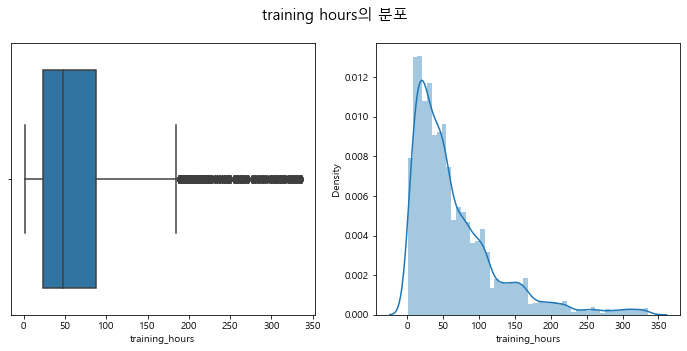

In [441]:
plt.subplots(figsize=(12,5))
plt.subplot(121)
sns.boxplot('training_hours', data=df)
plt.subplot(122)
sns.distplot(df['training_hours'])
plt.suptitle('training hours의 분포', fontsize=15)
plt.show()

boxplot에서는 이상치가 있는 것처럼 보입니다. 하지만 **최댓값을 넘어서 데이터가 연속적으로 분포하기때문에, 따로 training_hours에 대한 이상치 처리는 실시하지 않았습니다.** 대신 데이터가 왼쪽으로 많이 치우쳐있습니다. 이를 해소하기 위해서 **log 변환**을 실시하였습니다. 

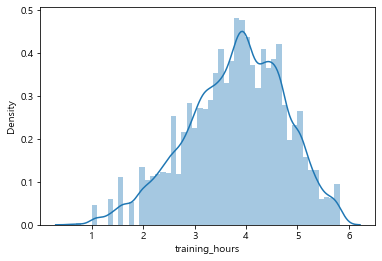

In [442]:
df['training_hours'] = np.log1p(df['training_hours'])
sns.distplot(df['training_hours']);

로그 변환을 실시한 후 분포가 정규분포에 가까워진것을 확인할 수 있습니다.

## 1.13. target

- 0 : Not looking for job change
- 1 : Looking for a job change

0.0    14087
1.0     4607
Name: target, dtype: int64

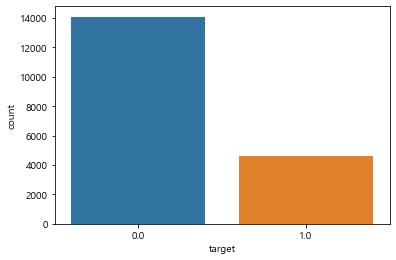

In [443]:
sns.countplot(x='target', data=df);

df['target'].value_counts()

마지막으로 종속변수인 target입니다. **전직을 고려하지 않고 있음을 의미하는 0에 데이터가 치우쳐있습니다.** 이와 같이 **imbalanced data**의 경우에는 예측을 진행할 때 **샘플링**을 적용해야할 수 있으며, 성과 측정 시에도 **성과 지표 선정에 유의**해야할 것입니다. 따라서 불균형 데이터라는 것을 인지한 상태로 전처리는 여기서 마무리하도록 하겠습니다. 다음 게시글에서는 전처리를 한 것을 바탕으로 분류 예측을 실시할 예정입니다.

In [444]:
df.to_csv('df_processed.csv', index=False)

분류 예측을 이어서 진행하기 위해 전처리한 내용을 csv로 저장하였습니다.

---

이렇게 두 개의 게시글에 걸쳐 EDA와 전처리를 완료하였습니다. 매번 EDA에서 많은 인사이트를 도출하기위해 노력하지만, 습관이 되어있지 않아 쉬운 일이 아닌 것 같습니다. 이번에도 시각화가 부족한 것 같아 많은 아쉬움이 남습니다. 다음에는 시각화에도 조금 더 신경을 써야겠습니다.

그리고 이번에는 처음으로 데이터 분석을 하며 통계 분석을 진행하였습니다. 하지만 통계에 대한 이론적 지식이 부족하여, 저에 분석이 제대로 된 분석인지에 대한 확신이 없습니다. 통계에 대해 다시 공부하는 시간을 가져야겠습니다.

오늘도 저의 글을 읽어주셔서 감사합니다.